In [5]:
import json
from argparse import ArgumentParser
from typing import List

import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from chex import Array
from collections import defaultdict

from ml4wifi.envs.sim import DATA_RATES
from ml4wifi.plots.config import AGENT_NAMES
from ml4wifi.plots.utils import confidence_interval

RESULTS_FILE = "/Users/wciezobka/ncn/mapc-mab/all_results.json"
APS_NAMES = [chr(ord('A') + i) for i in range(ord('Z') - ord('A') + 1)]
WARMUP = 300

## Loading results

In [2]:
with open(RESULTS_FILE, 'r') as file:
    results = json.load(file)

## Counting actions

In [3]:
# Define frequency dict of actions
actions_dict = defaultdict(lambda: 0)

# Count actions
agent = results[0]["agents"][0]
for run in agent["actions"]:
    for action in run[WARMUP:]:
        # Cast action to immutable type
        action = tuple([tuple(tx) for tx in action])
        actions_dict[action] += 1

# Sort actions by frequency
actions = sorted(actions_dict.items(), key=lambda x: x[1], reverse=True)

In [4]:
actions[:10]

[(((), (9,), (14,), (16,)), 24),
 (((), (10,), (), (16,)), 18),
 (((), (9,), (14,), (19,)), 17),
 (((7,), (), (12,), ()), 16),
 (((), (9,), (15,), (16,)), 14),
 (((), (10,), (), (18,)), 13),
 (((), (8,), (), (16,)), 13),
 (((5,), (), (14,), (18,)), 12),
 (((4,), (), (14,), ()), 12),
 (((6,), (), (12,), ()), 12)]

## Agregate actions by tx AP

### Calculating frequency dicts

In [8]:
action_to_names = lambda tx: "".join([APS_NAMES[i] for i, tx in enumerate(tx) if tx])
actions_aps = [(action_to_names(tx), freq) for tx, freq in actions]

# Aggregate actions by tx APs
actions_aps_aggregated = defaultdict(lambda: 0)
for action, freq in actions_aps:
    actions_aps_aggregated[action] += freq

# Re-run sorting
actions_aps_aggregated = sorted(actions_aps_aggregated.items(), key=lambda x: x[1], reverse=True)

In [9]:
actions_aps_aggregated

[('BCD', 350),
 ('ACD', 203),
 ('BD', 139),
 ('AC', 133),
 ('CD', 75),
 ('AD', 49),
 ('ABCD', 41),
 ('BC', 36),
 ('ABC', 14),
 ('ABD', 10)]

### Plottting

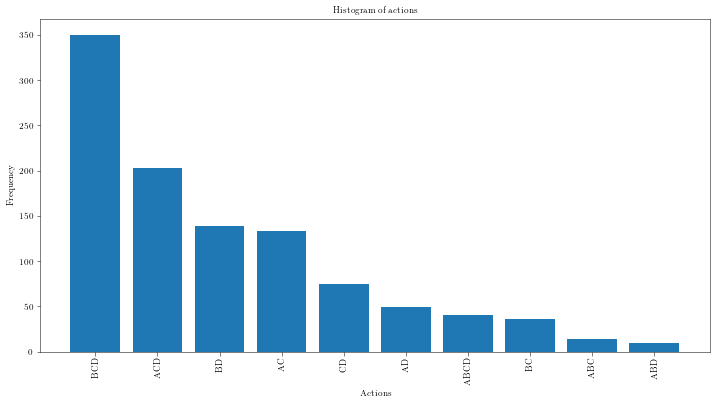

In [7]:
# Plot histogram of actions_aps_aggregated
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar([x[0] for x in actions_aps_aggregated], [x[1] for x in actions_aps_aggregated])
ax.set_xlabel("Actions")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of actions")
plt.xticks(rotation=90)
plt.savefig("actions.pdf", bbox_inches='tight')